# Homework 1
This is the template for the first homework assignment.
The only function that you are required to fill in and turn in to Gradescope is "compute_features".
Please do not edit definition of "compute_features" so the Gradescope unit tests run successfully.

In [2]:
# Uncomment and run this code if you want to verify your `sklearn` installation.
# If this cell outputs 'array([1])', then it's installed correctly.

#from sklearn import tree
#X = [[0, 0], [1, 1]]
#y = [0, 1]
#clf = tree.DecisionTreeClassifier(criterion='entropy')
#clf = clf.fit(X, y)
#clf.predict([[2, 2]])

In [4]:
import numpy as np


# When you turn this function in to Gradescope, it is easiest to copy and paste this cell to a new python file called hw1.py
# and upload that file instead of the full Jupyter Notebook code (which will cause problems for Gradescope)
def compute_features(names):
    """
    Given a list of names of length N, return a numpy matrix of shape (N, 260)
    with the features described in problem 2b of the homework assignment.
    
    Parameters
    ----------
    names: A list of strings
        The names to featurize, e.g. ["albert einstein", "marie curie"]
    
    Returns
    -------
    numpy.array:
        A numpy array of shape (N, 260)
    """
    
    raise NotImplementedError

You are not required to use the functions defined below, but they may be useful for you to think about how to structure your code.

In [6]:
from sklearn.linear_model import SGDClassifier
def getAccuracy(first,second):
    same=np.equal(first,second)
    top=np.sum(same)
    return (top/np.shape(first)[0])

def train_and_evaluate_sgd(X_train, y_train, X_test, y_test):
    """
    Trains a SGDClassifier on the training data and computes two accuracy scores, the
    accuracy of the classifier on the training data and the accuracy of the decision
    tree on the testing data.
        
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
    SGD_model = SGDClassifier(loss='log', max_iter=10000)
    model = SGD_model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    accuracy1=getAccuracy(y_prime_train, y_train)
    y_test_predict = model.predict(X_test)
    accuracy2=getAccuracy(y_prime_test, y_test)
    return accuracy1, accuracy2

    return 0.0, 0.0

In [5]:
from sklearn.tree import DecisionTreeClassifier


def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test):
    """
    Trains an unbounded decision tree on the training data and computes two accuracy scores, the
    accuracy of the decision tree on the training data and the accuracy of the decision
    tree on the testing data.
    
    The decision tree should use the information gain criterion (set criterion='entropy')
    
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
    return 0.0, 0.0


def train_and_evaluate_decision_stump(X_train, y_train, X_test, y_test):
    """
    Trains a decision stump of maximum depth 4 on the training data and computes two accuracy scores, the
    accuracy of the decision stump on the training data and the accuracy of the decision
    tree on the testing data.
    
    The decision tree should use the information gain criterion (set criterion='entropy')
    
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
    return 0.0, 0.0

In [1]:
def train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test):
    """
    Trains a SGDClassifier with stumps on the training data and computes two accuracy scores, the
    accuracy of the classifier on the training data and the accuracy of the decision
    tree on the testing data.
        
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training and testing accuracies represented as a tuple of size 2.
    """
    def train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test):
    ncols=np.shape(X_train)[1]
    stumps=[]
    features=[]
    stump_tree=np.zeros((np.shape(X_train)[0],50))
    for j in range(50):
        half=int(ncols/2)
        my_features=np.random.choice(ncols,size=half,replace=False)
        features.append(my_features)
        subsetted_X_train=X_train[:,my_features]
        stump = DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(subsetted_X_train, y_train)
        stumps.append(stump)
        stump_output = stump.predict(subsetted_X_train)
        stump_tree[:,j] = stump_output
    output=np.zeros((np.shape(X_test)[0],50))
    for j in range(50):
        j_features=features[j]
        X_subset=X_test[:,j_features]
        output[:,j] = stumps[j].predict(X_subset)
    model4 = SGDClassifier(loss='log', max_iter=50000).fit(stump_tree,y_train)
    y_prime_train = model4.predict(stump_tree)
    part1=getAccuracy(y_prime_train, y_train)
    y_prime_test = model4.predict(output)
    part2=getAccuracy(y_prime_test, y_test)
    return part1, part2

IndentationError: expected an indented block (<ipython-input-1-af209838b076>, line 23)

In [8]:
def load_cv_split(fold):
    """
    Parameters
    ----------
    fold: int
        The integer index of the split to load, i.e. 0, 1, 2, 3, or 4
        
    Returns
    -------
    A tuple of 4 numpy arrays that correspond to the following items:
        X_train, y_train, X_test, y_test
    """
    return None, None, None, None

In [13]:
import os
import matplotlib.pyplot as plt


def plot_results(sgd_train_acc, sgd_train_std, sgd_heldout_acc, sgd_heldout_std, sgd_test_acc,
                 dt_train_acc, dt_train_std, dt_heldout_acc, dt_heldout_std, dt_test_acc,
                 dt4_train_acc, dt4_train_std, dt4_heldout_acc, dt4_heldout_std, dt4_test_acc,
                 stumps_train_acc, stumps_train_std, stumps_heldout_acc, stumps_heldout_std, stumps_test_acc):
    """
    Plots the final results from problem 2. For each of the 4 classifiers, pass
    the training accuracy, training standard deviation, held-out accuracy, held-out
    standard deviation, and testing accuracy.

    Although it should not be necessary, feel free to edit this method.
    """
    train_x_pos = [0, 4, 8, 12]
    cv_x_pos = [1, 5, 9, 13]
    test_x_pos = [2, 6, 10, 14]
    ticks = cv_x_pos

    labels = ['sgd', 'dt', 'dt4', 'stumps (4 x 50)']

    train_accs = [sgd_train_acc, dt_train_acc, dt4_train_acc, stumps_train_acc]
    train_errors = [sgd_train_std, dt_train_std, dt4_train_std, stumps_train_std]

    cv_accs = [sgd_heldout_acc, dt_heldout_acc, dt4_heldout_acc, stumps_heldout_acc]
    cv_errors = [sgd_heldout_std, dt_heldout_std, dt4_heldout_std, stumps_heldout_std]

    test_accs = [sgd_test_acc, dt_test_acc, dt4_test_acc, stumps_test_acc]

    fig, ax = plt.subplots()
    ax.bar(train_x_pos, train_accs, yerr=train_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='train')
    ax.bar(cv_x_pos, cv_accs, yerr=cv_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='held-out')
    ax.bar(test_x_pos, test_accs, align='center', alpha=0.5, capsize=10, label='test')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_title('Models')
    ax.yaxis.grid(True)
    ax.legend()
    plt.tight_layout()

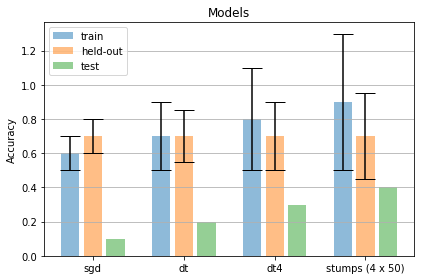

In [17]:
plot_results(0.6, 0.1, 0.7, 0.1, 0.1,
             0.7, 0.2, 0.7, 0.15, 0.2,
             0.8, 0.3, 0.7, 0.2, 0.3,
             0.9, 0.4, 0.7, 0.25, 0.4)